In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

densityPb = 11.34
densityAl = 2.70

def expFitPb(x, A, b):
    return A*np.e**(x*-b)

def expFitAl(x, A, b):
    return A*np.e**(x*-b)

def linearFit(x, m, b):
    return m*x + b


def DataVolts(csvFile, delim):
    data = np.genfromtxt(csvFile, delimiter=delim)
    voltage = data[:,0]
    counts = data[:,1]
    rate = data[:,2]
    return data, voltage, counts, rate
    

def DataAbs(csvFile, delim):
    data = np.genfromtxt(csvFile, delimiter = delim)
    thickness = data[:,0]
    countAvg = data[:,1]
    countSD = data[:,2]
    rateAvg = data[:,3]
    rateSD = data[:,4]
    
    return data, thickness, countAvg, countSD, rateAvg, rateSD


def SubplottingAbs (data, thicknessError, radiation, material, density, a, skipPoints, fixedStart):
    
    x = np.linspace(min(data[:,0]), max(data[:,0]), 1000)
    data = data[skipPoints:,:]
    data[:,0] = data[:,0]/10
    if fixedStart==True:
        dataFixedStart = np.copy(data)
        dataFixedStart[0,2] = 0.01
        dataFixedStart[0,4] = 0.01
        dataFixedStart[-1,2]= 0.01
        dataFixedStart[-1,4]= 0.01
    
    fitParamsCount, fitCovarCount = curve_fit(a, data[:,0], data[:,1], sigma=data[:,2])
    sigmaCount = 3*np.sqrt([fitCovarCount[0,0], fitCovarCount[1,1]])
    
    fitParamsRate, fitCovarRate = curve_fit(a, data[:,0], data[:,3], sigma=data[:,4])
    sigmaRate = 3*np.sqrt([fitCovarRate[0,0], fitCovarRate[1,1]])
    
    if fixedStart==True:
        fitParamsCountFixed, fitCovarCountFixed = curve_fit(a, data[:,0], data[:,1], sigma=dataFixedStart[:,2])
        sigmaCountFixed = 3*np.sqrt([fitCovarCountFixed[0,0], fitCovarCountFixed[1,1]])
    
        fitParamsRateFixed, fitCovarRateFixed = curve_fit(a, data[:,0], data[:,3], sigma=dataFixedStart[:,4])
        sigmaRateFixed = 3*np.sqrt([fitCovarRateFixed[0,0], fitCovarRateFixed[1,1]])
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,12), sharex=True)
    
    ax1.errorbar(data[:,0], data[:,1], yerr=data[:,2], xerr=thicknessError, fmt='o')
    ax1.plot(x, a(x, fitParamsCount[0], fitParamsCount[1]), label="Best Fit:\n  Counts = $%0.2fe^{-(%0.2f)(%0.2f)x}$"%(fitParamsCount[0], fitParamsCount[1], density))
    if fixedStart==True:
        ax1.plot(x, a(x, fitParamsCountFixed[0], fitParamsCountFixed[1]), label="Fixed Start Best Fit: \n Counts = $%0.2fe^{-(%0.2f)(%0.2f)x}$"%(fitParamsCountFixed[0], fitParamsCountFixed[1], density))
    ax1.set_title("Mean Total Counts vs Thickness", fontsize = 18)
    ax1.set_ylabel("Counts", fontsize=16)
    ax1.set_xlim([min(data[:,0])-0.05, max(data[:,0]+0.05)])
    ax1.set_ylim([min(data[:,1])-20, max(data[:,1]+20)])
    ax1.legend(bbox_to_anchor=(1,1), fontsize=12)
    
    ax2.errorbar(data[:,0], data[:,3], yerr=data[:,4], xerr=thicknessError, fmt='o')
    ax2.plot(x, a(x, fitParamsRate[0], fitParamsRate[1]), label='Best Fit: \n Rate = $%0.2fe^{-(%0.2f)(%0.2f)x}$'%(fitParamsRate[0], fitParamsRate[1], density))
    if fixedStart==True:
        ax2.plot(x, a(x, fitParamsRateFixed[0], fitParamsRateFixed[1]), label='Fixed Start Best Fit: \n Rate = $%0.2fe^{-(%0.2f)(%0.2f)x}$'%(fitParamsRateFixed[0], fitParamsRateFixed[1], density))
    ax2.legend(bbox_to_anchor=(1,1))
    ax2.set_ylim([min(data[:,3])-2, max(data[:,3]+2)])
    ax2.set_title("Mean Rate vs Thickness", fontsize=18)
    ax2.set_ylabel("Rate (Counts/sec)", fontsize=16)
    
    ax3.errorbar(data[:,0], data[:,1], yerr=data[:,2], xerr=thicknessError, fmt='o', capthick=2)
    ax3.plot(x, a(x, fitParamsCount[0], fitParamsCount[1]))
    ax3.plot(x, a(x, fitParamsCount[0]+sigmaCount[0], fitParamsCount[1]+sigmaCount[1]), label='Low-Slope Best Fit')
    ax3.plot(x, a(x, fitParamsCount[0]-sigmaCount[0], fitParamsCount[1]-sigmaCount[1]), label='High-Slope Best Fit')
    ax3.plot(0,0, color='w', label = '$\log(Counts)=\mu p x+ \log(Counts_{max})$ \n where $p = %0.2f$ and $\mu = %0.2f \pm %0.2f$'%(density, fitParamsCount[1], sigmaCount[1]))
    ax3.set_title("Mean Total Counts vs Thickness, Semilog", fontsize=18)
    ax3.set_ylabel("log(Counts)", fontsize=16)
    ax3.set_ylim([min(data[:,1])-20, max(data[:,1]+20)])
    ax3.legend(bbox_to_anchor=(1,1), fontsize='14')
    ax3.set_yscale('log')
    ax3.set_xlabel(material + " Thickness (cm)", fontsize=16)

    
    ax4.errorbar(data[:,0], data[:,3], yerr=data[:,4], xerr=thicknessError, fmt='o', capthick=2)
    ax4.plot(x, a(x, fitParamsRate[0], fitParamsRate[1]))
    ax4.plot(x, a(x, fitParamsRate[0]+sigmaRate[0], fitParamsRate[1]+sigmaRate[1]), label='Low-Slope Best Fit')
    ax4.plot(x, a(x, fitParamsRate[0]-sigmaRate[0], fitParamsRate[1]-sigmaRate[1]), label='High-Slope Best Fit')
    ax4.plot(0,0, color='w', label = '$\log(Rate)=\mu p x+ \log(Rate_{max})$ \n where $p = %0.2f$ and $\mu = %0.2f \pm %0.2f$'%(density, fitParamsRate[1], sigmaRate[1]))
    ax4.set_title("Mean Rate vs Thickness, Semilog", fontsize=18)
    ax4.set_ylim([min(data[:,3])-1, max(data[:,3]+10)])
    ax4.set_ylabel("log(Rate)", fontsize=16)
    ax4.set_yscale('log')
    ax4.set_xlabel(material + " Thickness (cm)", fontsize=16)
    ax4.legend(bbox_to_anchor=(1,1), fontsize=16)

    
    fig.suptitle("%s with %s"%(radiation, material), fontsize = 24)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    
    fig.savefig("%sWith%s.png"%(radiation, material), bbox_to_inches='tight', dpi=500)
    fig.show()
    
    
    

## Counts vs. Voltage

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/lib/python3/dist-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300
/usr/lib/python3/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


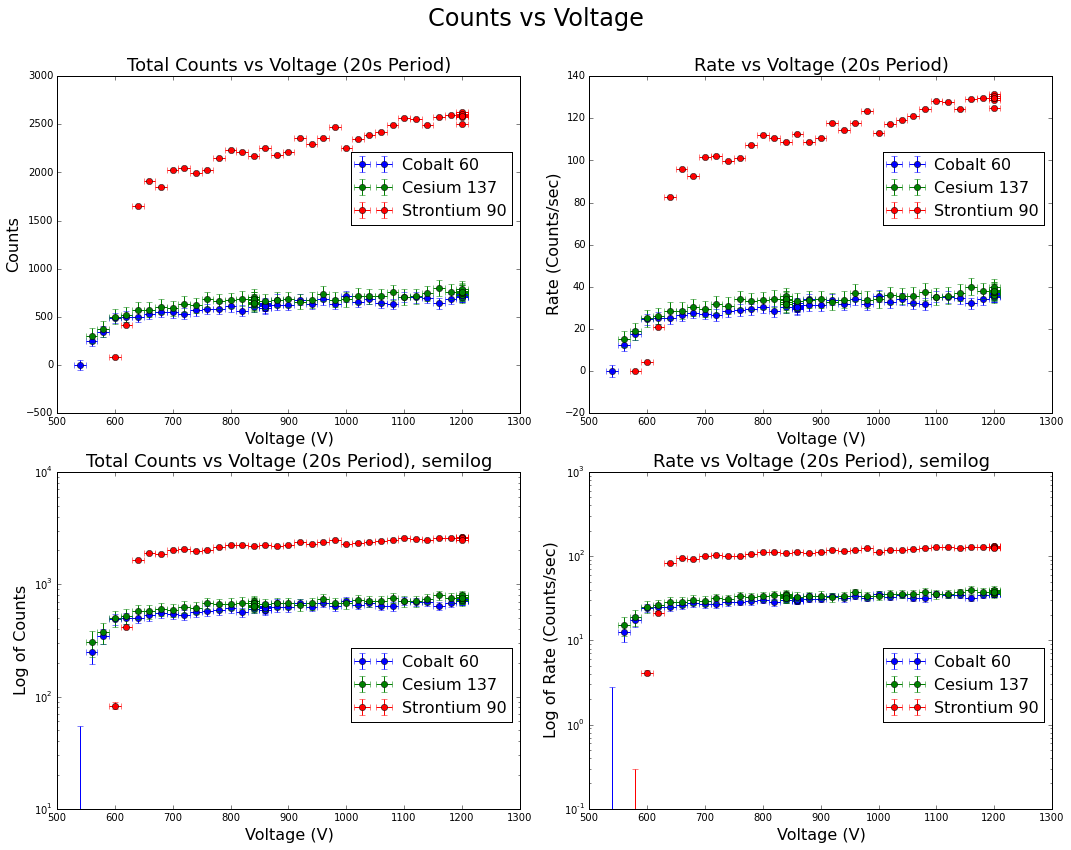

In [4]:
dataCo, voltageCo, countsCo, rateCo = DataVolts('Finding slope of counts as a function of voltage - Cobalt 60 Export Data-2.csv', ',')
dataCs, voltageCs, countsCs, rateCs = DataVolts('Finding slope of counts as a function of voltage - Cesium 137 Export Data.csv', ',')
dataSr, voltageSr, countsSr, rateSr = DataVolts('Finding slope of counts as a function of voltage - Strontium 90 Export Data.csv', ',')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,12))

ax1.errorbar(voltageCo, countsCo, xerr=10, yerr=3*18.3, fmt='o', label='Cobalt 60')
ax1.errorbar(voltageCs, countsCs, xerr=10, yerr=3*26.6, fmt='o', label='Cesium 137')
ax1.errorbar(voltageSr, countsSr, xerr=10, yerr=3*2.0, fmt='o', label='Strontium 90')
ax1.set_title('Total Counts vs Voltage (20s Period)', fontsize=18)
ax1.set_xlabel('Voltage (V)', fontsize=16)
ax1.set_ylabel('Counts', fontsize=16)
ax1.legend(bbox_to_anchor=(1,0.8), fontsize=16)

ax2.errorbar(voltageCo, rateCo, xerr=10, yerr=3*0.92, fmt='o', label='Cobalt 60')
ax2.errorbar(voltageCs, rateCs, xerr=10, yerr=3*1.33, fmt='o', label='Cesium 137')
ax2.errorbar(voltageSr, rateSr, xerr=10, yerr=3*0.10, fmt='o', label='Strontium 90')
ax2.set_title('Rate vs Voltage (20s Period)', fontsize=18)
ax2.set_xlabel('Voltage (V)', fontsize=16)
ax2.set_ylabel('Rate (Counts/sec)', fontsize=16)
ax2.legend(bbox_to_anchor=(1,0.8), fontsize=16)

ax3.errorbar(voltageCo, countsCo, xerr=10, yerr=3*18.3, fmt='o', label='Cobalt 60')
ax3.errorbar(voltageCs, countsCs, xerr=10, yerr=3*26.6, fmt='o', label='Cesium 137')
ax3.errorbar(voltageSr, countsSr, xerr=10, yerr=3*2.0, fmt='o', label='Strontium 90')
ax3.set_title('Total Counts vs Voltage (20s Period), semilog', fontsize=18)
ax3.set_xlabel('Voltage (V)', fontsize=16)
ax3.set_ylabel('Log of Counts', fontsize=16)
ax3.set_yscale('log')
ax3.legend(bbox_to_anchor=(1,0.5), fontsize=16)

ax4.errorbar(voltageCo, rateCo, xerr=10, yerr=3*0.92, fmt='o', label='Cobalt 60')
ax4.errorbar(voltageCs, rateCs, xerr=10, yerr=3*1.33, fmt='o', label='Cesium 137')
ax4.errorbar(voltageSr, rateSr, xerr=10, yerr=3*0.10, fmt='o', label='Strontium 90')
ax4.set_title('Rate vs Voltage (20s Period), semilog', fontsize=18)
ax4.set_xlabel('Voltage (V)', fontsize=16)
ax4.set_ylabel('Log of Rate (Counts/sec)', fontsize=16)
ax4.set_yscale('log')
ax4.legend(bbox_to_anchor=(1,0.5), fontsize=16)

fig.suptitle('Counts vs Voltage', fontsize =24)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

fig.savefig("CountsVsVoltage.png", bbox_to_inches='tight', dpi=500)
fig.show()

## Cobalt 60 - Aluminum

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/lib/python3/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


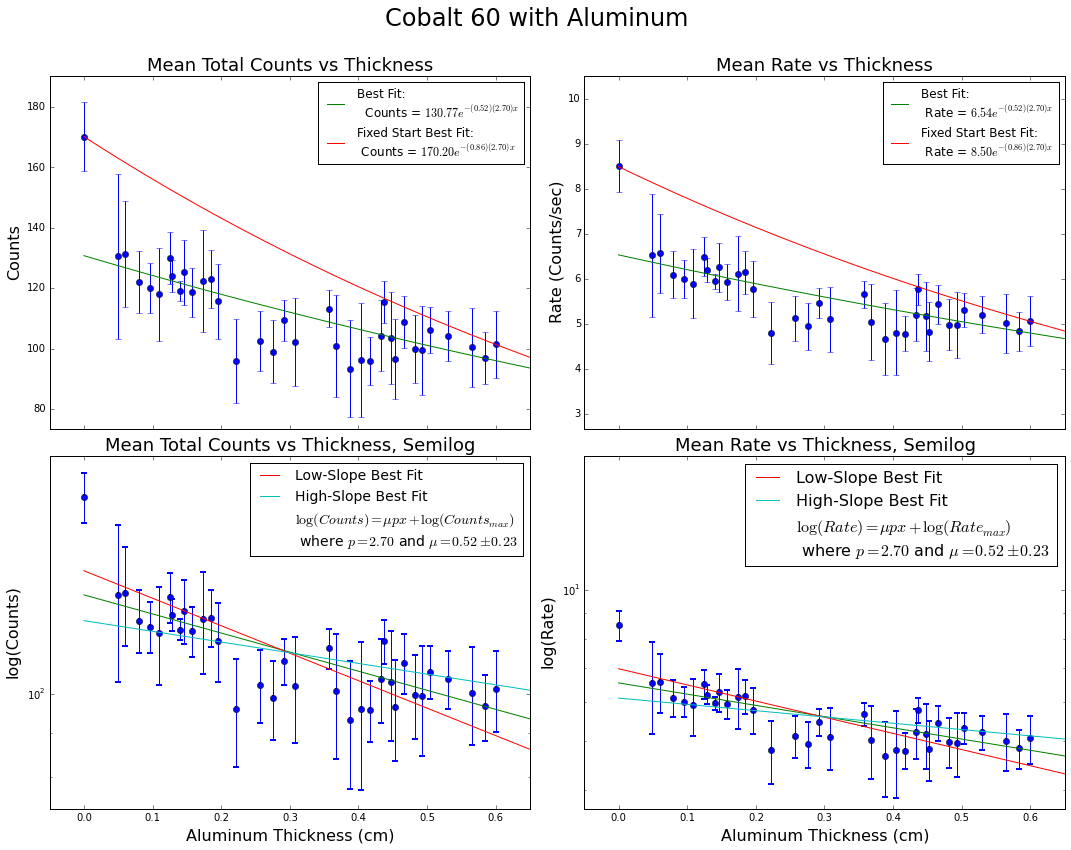

In [5]:
dataAl, thicknessAl, countAvgAl, countSDAl, rateAvgAl, rateSDAl = DataAbs("Testing Absorption - Colbalt 60 Retake Export Data-Aluminum.csv", ",")
SubplottingAbs (dataAl, 0, "Cobalt 60", "Aluminum", densityAl, expFitAl, 0, True)

## Cobalt 60 - Lead

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/lib/python3/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


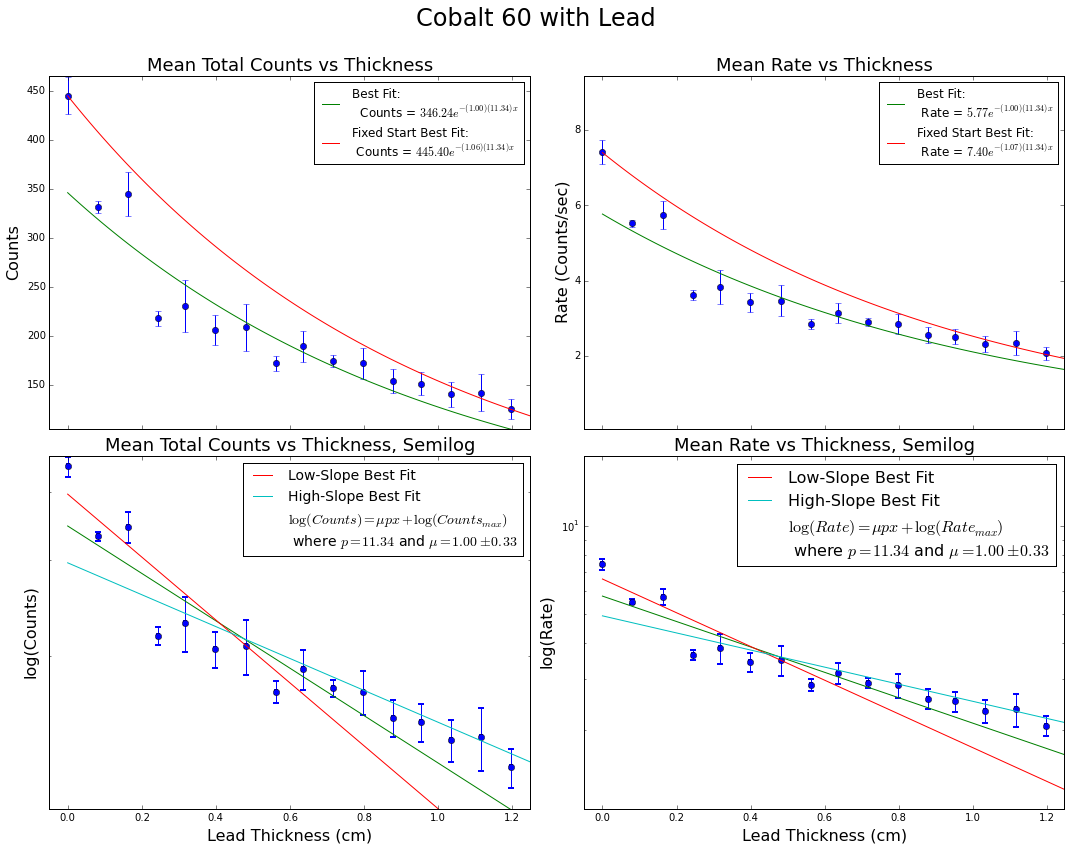

In [6]:
dataPb, thicknessPb, countAvgPb, countSDPb, rateAvgPb, rateSDPb = DataAbs("Testing Absorption - Cobalt 60 Retake Export Data-Lead.csv", ",")
SubplottingAbs(dataPb, 0.0027786, "Cobalt 60", "Lead", densityPb, expFitPb, 0, True)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/lib/python3/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


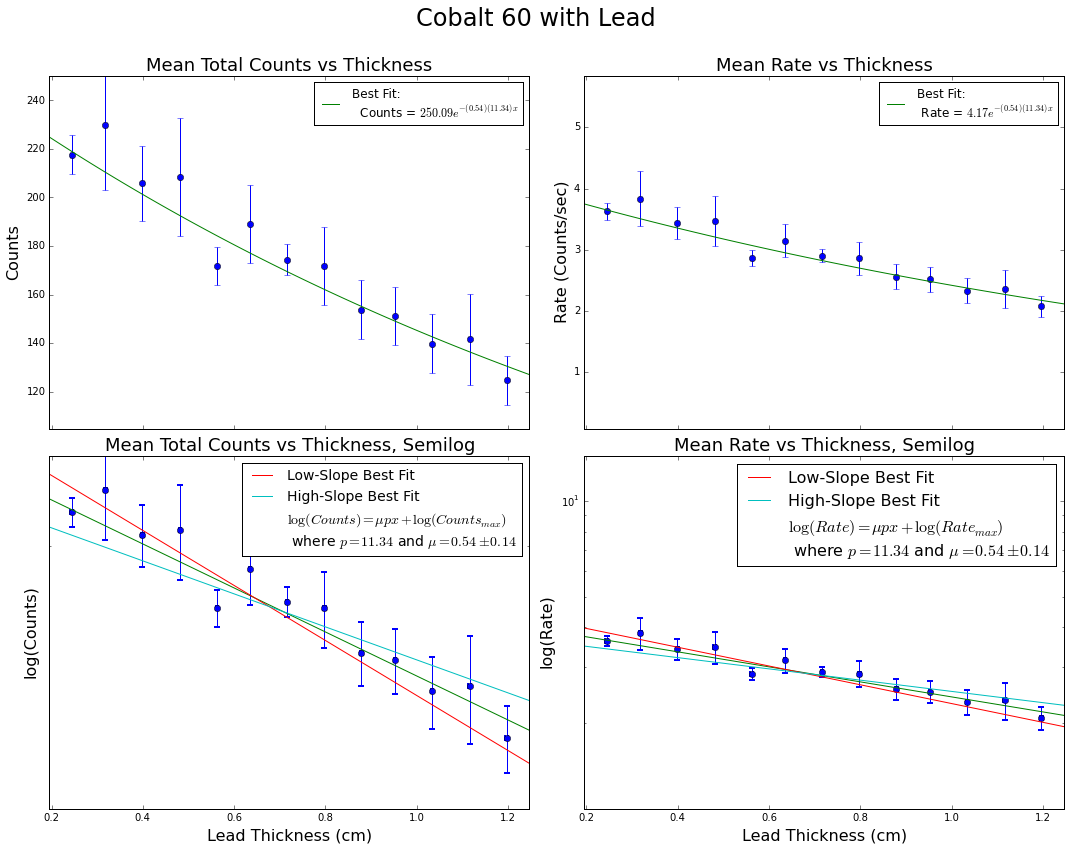

In [7]:
dataPb, thicknessPb, countAvgPb, countSDPb, rateAvgPb, rateSDPb = DataAbs("Testing Absorption - Cobalt 60 Retake Export Data-Lead.csv", ",")
SubplottingAbs(dataPb, 0.0027786, "Cobalt 60", "Lead", densityPb, expFitPb, 3, False)